In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
from utils import plot_metrics, compare_rewards_plot

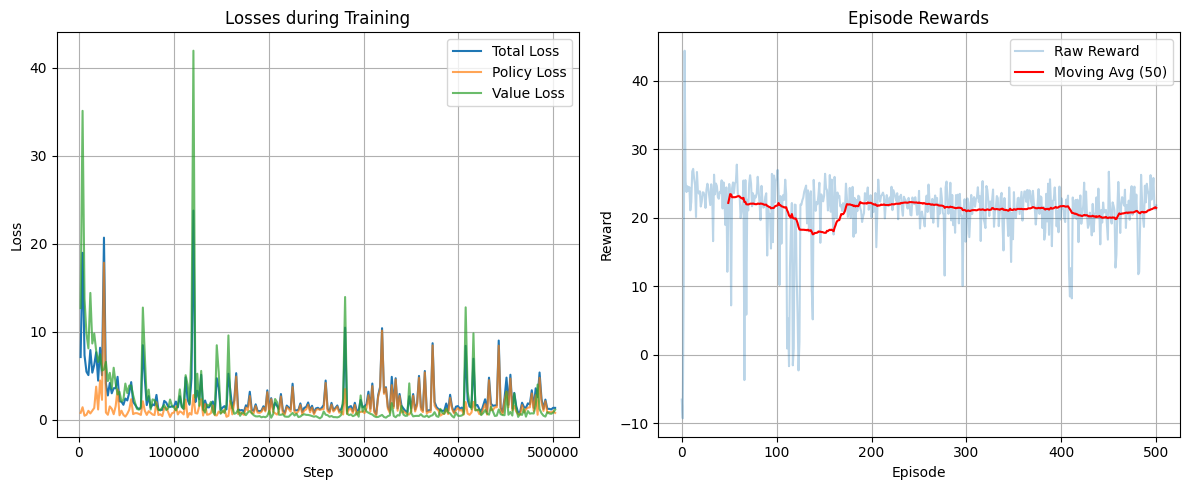

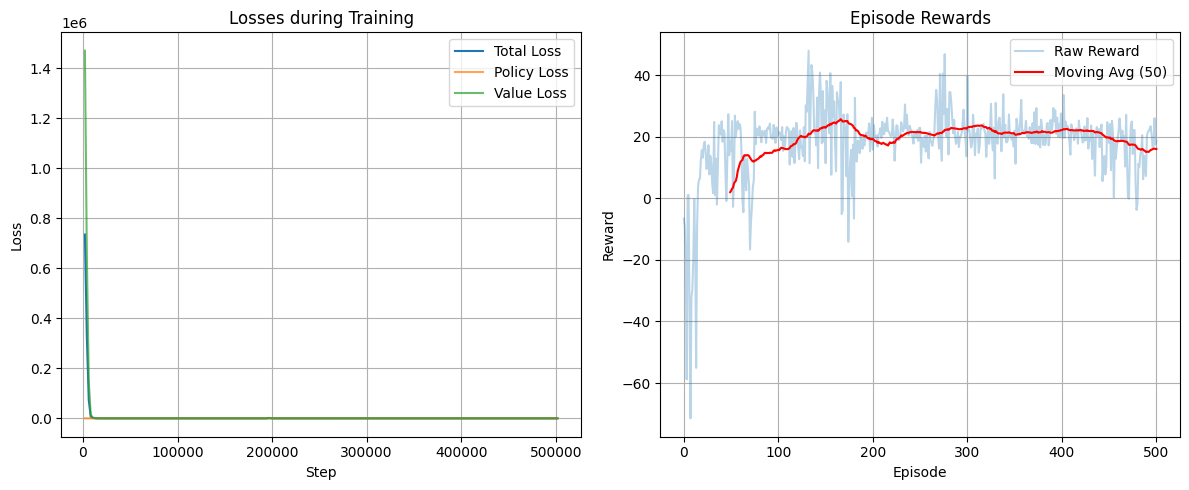

In [6]:
raw_dir = "data/raw_pytorch/Swimmer-v4/mlp_256_raw_pytorch_20250430_233539/"
icm_dir = "data/ppo_icm/Swimmer-v4/mlp_256_icm_pytorch_20250430_234526"

plot_metrics(raw_dir)
plot_metrics(icm_dir)

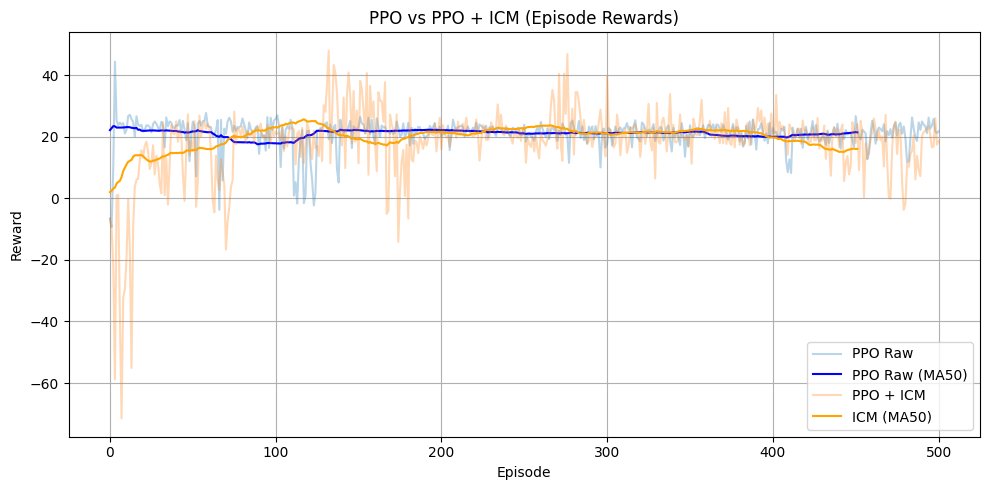

In [5]:
raw_dir = "data/raw_pytorch/Swimmer-v4/mlp_256_raw_pytorch_20250430_233539/"
icm_dir = "data/ppo_icm/Swimmer-v4/mlp_256_icm_pytorch_20250430_234526"

compare_rewards_plot(raw_dir, icm_dir)


In [2]:
from pathlib import Path
from utils import play_model_from_weights
import os
from pathlib import Path

def get_latest_checkpoint(run_dir):
    """
    Return the path to the latest checkpoint file in a run directory.
    """
    ckpt_dir = Path(run_dir) / "checkpoints"
    if not ckpt_dir.exists():
        raise FileNotFoundError(f"Checkpoint directory not found: {ckpt_dir}")
    
    ckpt_files = sorted(ckpt_dir.glob("*.pt"), key=lambda f: f.stat().st_mtime)
    if not ckpt_files:
        raise FileNotFoundError(f"No checkpoint files found in {ckpt_dir}")
    
    return ckpt_files[-1]
    
# Set MuJoCo to use headless EGL rendering
os.environ["MUJOCO_GL"] = "egl"

print("\nPlaying model...")

# Paths to trained runs
raw_dir = "data/raw_pytorch/Swimmer-v4/mlp_256_raw_pytorch_20250430_233539"
icm_dir = "data/ppo_icm/Swimmer-v4/mlp_256_icm_pytorch_20250430_234526"

# Automatically get latest checkpoint
raw_ckpt = get_latest_checkpoint(raw_dir)
icm_ckpt = get_latest_checkpoint(icm_dir)

# Play both models using the appropriate agent type (auto-detected inside the function)
score_raw, vid_raw = play_model_from_weights(raw_ckpt, seed=42)
score_icm, vid_icm = play_model_from_weights(icm_ckpt, seed=42)

# Display results
print(f"Raw PPO score: {score_raw:.2f} | Video: {vid_raw}")
print(f"PPO + ICM score: {score_icm:.2f} | Video: {vid_icm}")


Playing model...
[✓] Loaded model from update 245, step 501760


/home/sebastian/codes/RL/utils.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(ckpt_path, map_location=device)
/home/sebastian/anaconda3/lib/pyt

[📹] Video saved to: data/raw_pytorch/Swimmer-v4/mlp_256_raw_pytorch_20250430_233539/video_ckpt_model_update_245_steps_501760_seed42.mp4
Episode length: 1000
Total score: 25.53
[✓] Loaded model from update 245, step 501760
[📹] Video saved to: data/ppo_icm/Swimmer-v4/mlp_256_icm_pytorch_20250430_234526/video_ckpt_model_update_245_steps_501760_seed42.mp4
Episode length: 1000
Total score: 20.84
Raw PPO score: 25.53 | Video: data/raw_pytorch/Swimmer-v4/mlp_256_raw_pytorch_20250430_233539/video_ckpt_model_update_245_steps_501760_seed42.mp4
PPO + ICM score: 20.84 | Video: data/ppo_icm/Swimmer-v4/mlp_256_icm_pytorch_20250430_234526/video_ckpt_model_update_245_steps_501760_seed42.mp4
